#1. Generate 20 real number for the variable X from the uniform distribution U [0,1]
#2.Construct the training set T = { (x1,y1),(x2,y2),......,(x20,y20)} using the relation
#Yi = sin (2 π xi) + εi where εi ~ N(0,0.25)

In [1]:
import random 
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x_train = np.random.uniform(0,1,20)
x_train.sort()
x_train

array([0.01382576, 0.04797629, 0.14244098, 0.18886041, 0.26441479,
       0.2663863 , 0.38150874, 0.39822704, 0.49507395, 0.56213721,
       0.56909569, 0.65902988, 0.6837675 , 0.70880841, 0.73159262,
       0.80338689, 0.8260621 , 0.85235914, 0.86950719, 0.94443449])

In [3]:
#2
e = np.random.normal(0,0.25,20)
y_train = np.sin(2* 3.14 * x_train ) + e
y_train

array([ 0.17494551,  0.12328694,  1.04564645,  0.6389544 ,  1.21670984,
        0.79082472,  0.98689827,  0.70212418,  0.0346548 , -0.2748874 ,
       -0.13057756, -0.52809343, -0.87487923, -1.02790069, -0.8236526 ,
       -1.18626512, -0.71353424, -0.35878453, -0.45250943, -0.21639138])

#3.In the similar way construct a testing set of size 50 i.e. Test =
#{(x’1,y’1),(x’2,y’2),......,(x’50,y’50)}

In [4]:
x_test = np.random.uniform(0,1,50)
x_test.sort()

In [5]:
#2
e = np.random.normal(0,0.25,50)
y_test = np.sin(2* 3.14 * x_test ) + e
y_test

array([ 0.22410711,  0.36523631,  0.42538395,  0.90095681,  1.3156976 ,
        1.01729497,  0.4233117 ,  1.23881784,  1.37924156,  0.77612044,
        0.88828066,  1.00761277,  0.81363728,  0.81288528,  1.09817961,
        1.1000797 ,  0.83096066,  0.73287667,  0.98764823,  0.2895885 ,
        0.47175781,  0.41534318,  0.27320466,  0.1791315 ,  0.23004977,
       -0.38618543, -0.28962255, -0.33891892, -0.927558  , -1.04194067,
       -0.71136389, -0.53773676, -0.68237711, -0.76260635, -0.79736764,
       -0.46733302, -0.91208763, -1.4093    , -0.76594177, -0.51743762,
       -0.81069492, -0.61965512, -0.34392066, -0.65972483, -0.90015733,
       -1.06097915,  0.16306975, -0.37715783, -0.25051696,  0.13509701])

#4.Estimate the Least Square polynomial regression model of order M= 1,2, 3, 9,
#using the training set T.
#For example, for M=1, we need to estimate
#F(x) = β1x + β0
#For M = 2
#F(x) = β2x2 + β1x + β0 .

In [6]:
def mat_A(x,m):
  A = []
  for i in range(m,-1,-1):
    A.append(x**i)
  A = np.array(A)
  A=A.T
  return A

In [7]:
A= mat_A(x_train , 2)
A.shape

(20, 3)

In [8]:
def find_U(x_train,y_train,m):
  A = mat_A(x_train,m)
  AtA = np.dot(A.T,A)
  AtAI = np.linalg.inv(AtA)
  AtY = np.dot(A.T,y_train)
  U = np.dot(AtAI , AtY)
  U = U.T
  return U 


In [9]:
#M =2
U = find_U(x_train,y_train , 2)
U.shape

(3,)

In [10]:
A_test = mat_A(x_test , 2)
A_test.shape

(50, 3)

6.Obtain the prediction on testing set and compute the RMSE for polynomial
regression models for order M =1,2,3 and 9.

In [11]:
y_pred = np.dot(A_test , U)
y_pred

array([ 7.23847025e-01,  7.11983782e-01,  7.11478425e-01,  6.17826687e-01,
        5.91005813e-01,  5.87705544e-01,  5.32738685e-01,  5.27164068e-01,
        4.99937739e-01,  4.94602098e-01,  4.23641034e-01,  4.08085284e-01,
        4.06819883e-01,  4.04857949e-01,  3.78591283e-01,  3.78434571e-01,
        3.77968336e-01,  3.68196100e-01,  3.61589888e-01,  3.20716928e-01,
        2.93089972e-01,  2.81996907e-01,  1.79420181e-01,  1.75203630e-01,
        1.45423378e-01, -1.23885332e-04, -6.32115799e-03, -5.93361677e-02,
       -8.76877542e-02, -1.47154247e-01, -1.49903248e-01, -1.75218893e-01,
       -2.03118045e-01, -2.17480180e-01, -2.29560880e-01, -2.95024997e-01,
       -3.54271308e-01, -3.63197323e-01, -5.77706677e-01, -6.56914518e-01,
       -6.58290852e-01, -6.81434351e-01, -8.00904052e-01, -8.29174518e-01,
       -8.40762680e-01, -8.69465597e-01, -1.04087375e+00, -1.09593323e+00,
       -1.11270809e+00, -1.14736649e+00])

#RMSE

In [12]:
def rmse(y_act,y_pred):  #y_act =y_test
    error = y_act - y_pred
    sqr_err = np.square(error)
    mse = sqr_err.mean()
    rmse = np.sqrt(mse)
    return rmse


In [13]:
rmse(y_test,y_pred)

0.5406240111788713

#7. Plot the estimate obtained by polynomial regression models for order M =1,2,3
#and 9 for TRAINING SET along with y1, y2, , y50. . Also plot our actual mean estimate
#E(Y/X) = sin(2 π xi)

In [14]:
# plt.scatter(x_test,y_test , label='actual' , c='blue')
# plt.plot(x_test,y_test, label='predicted' ,c='red')
# plt.legend()
# plt.show()

Plot the estimate obtained by polynomial regression models for order M =1,2,3
and 9 for testing set along with y’1, y’2, , y’50. . Also plot the sin(2 π x’i) .

#m=1

In [30]:
A_test = mat_A(x_test , 1)
U = find_U(x_train,y_train , 1)
y_pred = np.dot(A_test , U)

RMSE  0.5234061193138174


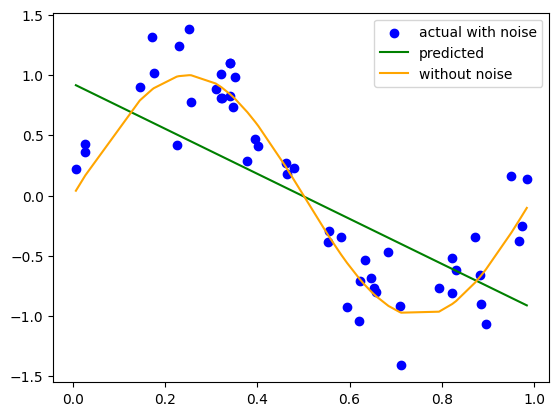

In [31]:
plt.scatter(x_test,y_test , label ='actual with noise' , c='b')
plt.plot(x_test,y_pred , label='predicted' , c='g')
plt.plot(x_test, np.sin(2*3.14 * x_test),c='orange' , label = 'without noise')
plt.legend()
print('RMSE ' ,rmse(y_test,y_pred))
plt.show()

#m=2

In [32]:
A_test = mat_A(x_test , 2)
U = find_U(x_train,y_train , 2)
y_pred = np.dot(A_test , U)

RMSE  0.5406240111788713


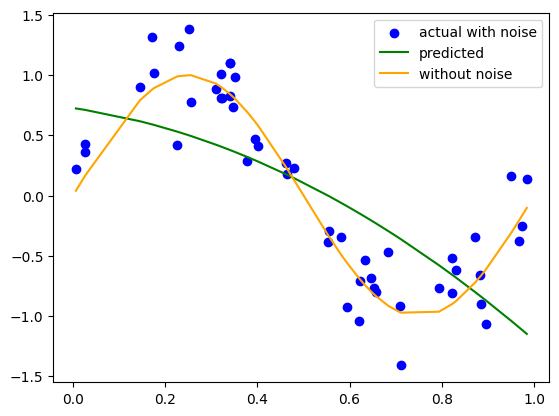

In [33]:
plt.scatter(x_test,y_test , label ='actual with noise' , c='b')
plt.plot(x_test,y_pred , label='predicted' , c='g')
plt.plot(x_test, np.sin(2*3.14 * x_test),c='orange' , label = 'without noise')
print('RMSE ' ,rmse(y_test,y_pred))
plt.legend()
plt.show()

#m=3|

In [34]:
A_test = mat_A(x_test , 3)
U = find_U(x_train,y_train , 3)
y_pred = np.dot(A_test , U)

RMSE  0.27544936484634247


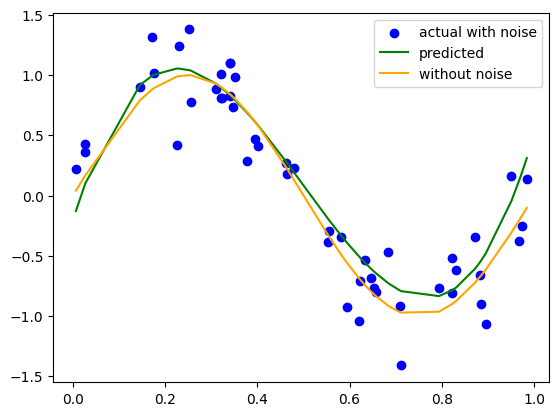

In [35]:
plt.scatter(x_test,y_test , label ='actual with noise' , c='b')
plt.plot(x_test,y_pred , label='predicted' , c='g')
plt.plot(x_test, np.sin(2*3.14 * x_test),c='orange' , label = 'without noise')
print('RMSE ' ,rmse(y_test,y_pred))
plt.legend()
plt.show()

#m=9

In [36]:
A_test = mat_A(x_test , 9)
U = find_U(x_train,y_train , 9)
y_pred = np.dot(A_test , U)

RMSE  0.8890486541812306


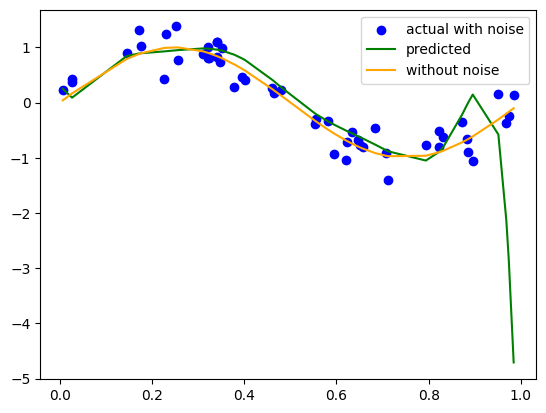

In [37]:
plt.scatter(x_test,y_test , label ='actual with noise' , c='b')
plt.plot(x_test,y_pred , label='predicted' , c='g')
plt.plot(x_test, np.sin(2*3.14 * x_test),c='orange' , label = 'without noise')
print('RMSE ' ,rmse(y_test,y_pred))
plt.legend()
plt.show()

#OBSERVATION 

#DATA IS UNDERFITTED IN M=1,2

#DATA IS OVERFITTED IN M= 9

#DATA IS BALANCED IN M = 4  (LESS RMSE)

